<a href="https://colab.research.google.com/github/widegather1216/2-2deep/blob/main/010_K_means_%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### K-means : 비지도 학습 - clustering - 차원축소(dimentionality reduction):주성분분석(PCA)

#### 데이터간 유사도(거리) 측정방법 : 유클리드 거리, 맨해튼 거리, 민코프스키 거리, 코사인 유사도 등...

In [ ]:
#library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import svm, datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#### sales data.csv
#### 1) Channel: 고객 채널(호텔/레스토랑), 또는 소매 채널(명목형 데이터): 1,2,
#### 2) Region : 고객 지역(명목형 데이터): 1,2,3,
#### 3) Fresh  : 신선한 제품에 대한 연간 지출(연속형 데이터)
#### 4) Milk   : 유제품에 대한 연간 지출(연속형 데이터)
#### 5) Grecery: 식료품에 대한 연간 지출(연속형 데이터)
#### 6) Frozen : 냉동 제품에 대한 연간 지출(연속형 데이터)
#### 7) Detergents_Paper : 세제 및 종이 제품에대한 연간 지출(연속형 데이터)
#### 8) Delicassen : 조제 식품에 대한 연간 지출(연속형 데이터)

In [ ]:
# 데이터 불러오기
from google.colab import files
file_uploaded=files.upload()

data = pd.read_csv('sales data.csv')
data.head()

Saving sales data.csv to sales data.csv


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# 연속형, 명목형 데이터로 분류
# 머신러닝 모델에 사용하기 위해 범주형 데이터를 수치형 데이터로 변환하는 전처리 과정
# One-hot encoding을 통해 범주형 데이터를 0, 1로 변환
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for col in categorical_features:
  dummies = pd.get_dummies(data[col], prefix=col)
  data = pd.concat([data, dummies], axis=1)
  data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


In [ ]:
# 연속형 데이터의 전처리 (스케일링 : Scailing)
# 일정한 범위를 유지하도록 사이킷 런의 MinMaxScaler() 사용
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

data_transformed = pd.DataFrame(data_transformed, columns=data.columns)
data_transformed.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0.0,1.0,0.0,0.0,1.0
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0.0,1.0,0.0,0.0,1.0
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0.0,1.0,0.0,0.0,1.0
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,1.0,0.0,0.0,0.0,1.0
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0.0,1.0,0.0,0.0,1.0


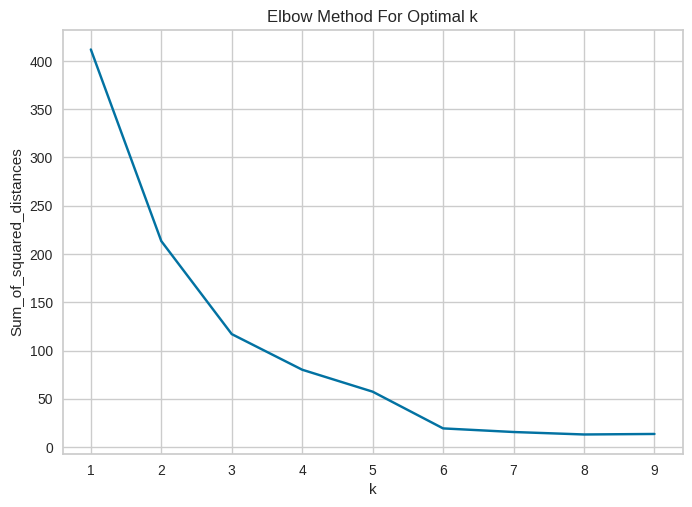

In [ ]:
# 데이터 전처리 완류후 .....
# K 값 추출 (타당성 평가)
Sum_of_squared_distances = []
K = range(1,10)  # k 값을 1~10 까지 적용
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(data_transformed)    #  KMeans 모델 훈련
  Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

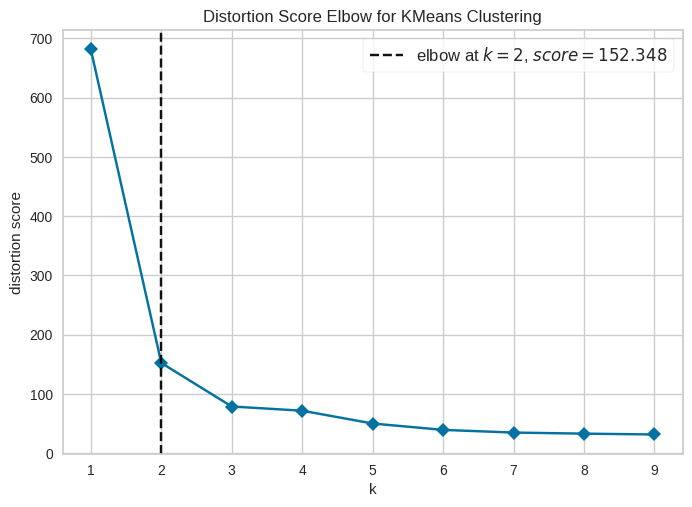

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#########################################################
# 엘보 그림 2
########################################################
from yellowbrick.cluster import KElbowVisualizer

iris = datasets.load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns = iris.feature_names)

k=0
kmeans = KMeans(n_clusters=k, random_state=7)
visualizer = KElbowVisualizer(kmeans, k=(1,10), timings=False)
visualizer.fit(df)
visualizer.show()

#############################################################################
#### 밀도기반 군집 분석 (Density-Based Spatial Clustering of Applications with Noise, DBSCAN) : 일정 밀도 이상을 가진 데이터를 기준으로 군집을 형성하는 방법
############################################################################
#### 이상치가 많이 포함 되었을 때 사용
#### Noise 에 영향을 받지 않음
#### K-means 에 비해 연산량은 많지만 오목, 볼록 부분을 처리함
#########################################################################


#### PCA : 주성분 분석(Principal Component Analysis)
#################################################################
#### 특성 p개를 2~#개 정도로 압축해서 데이터를 시각화하여 봄
#### 유사한 특성(Feature)을 처리: 고차원 -> 저차원

In [ ]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.cluster import DBSCAN                  #밀도 기반 군집 분석
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize         # Changed the import to be from sklearn.preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC



In [ ]:
# data
from google.colab import files
file_uploaded=files.upload()

#X= pd.read_cas('../chap3/data/credit card.csv')
X = pd.read_csv('credit card.csv')
X = X.drop('CUST_ID', axis=1)           # 불러온 데이터에서 'CUST_ID'열(colum) 삭제
X.fillna(method='ffill', inplace=True)  # 결측값을 앞의 값으로 채움
print(X.head())


Saving credit card.csv to credit card.csv
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000             

<ipython-input-2-55e17acce2a0>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)  # 결측값을 앞의 값으로 채움


In [ ]:
# 전처리 & 데이터를 3차원으로 축소
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)            # 데이터를 평균 0, 표준편차 1로 조정합니다.
                                                # StandardScaler를 사용하여 데이터를 표준화합니다.

X_normalized = normalize(X_scaled)            # 데이터가 가우스 분포를 따르도록 정규화합니다.
                                                # normalize 함수를 사용하여 데이터를 정규화합니다.
X_normalized = pd.DataFrame(X_normalized)     # 넘파이 배열을 데이터프레임으로 변환합니다.
                                                # 정규화된 데이터를 Pandas DataFrame으로 변환합니다.

pca = PCA(n_components = 3)                   # 주성분의 개수를 3개로 설정하여 PCA 객체를 생성합니다.
                                                # PCA를 사용하여 데이터를 3차원으로 축소합니다.
X_principal = pca.fit_transform(X_normalized) # 정규화된 데이터에 PCA를 적용하여 차원을 축소합니다.
                                                # fit_transform 메서드를 사용하여 PCA 모델을 데이터에 적용합니다.
X_principal = pd.DataFrame(X_principal)       # 차원 축소된 데이터를 데이터프레임으로 변환합니다.
                                                # 결과를 Pandas DataFrame으로 변환합니다.
X_principal.columns = ['P1', 'P2', 'P3']      # 데이터프레임의 열 이름을 'P1', 'P2', 'P3'로 지정합니다.
                                                # 주성분을 나타내는 열 이름을 설정합니다.

In [ ]:
import plotly.express as px

fig = px.scatter_3d(X_principal, x='P1', y='P2', z='P3',
                    color=labels,
                    color_discrete_map={-1: 'black', 0: 'red', 1: 'green', 2: 'blue'},
                    title="DBSCAN Clustering with Plotly")
fig.show()

In [ ]:
# 데이터를 8차원으로 축소
pca = PCA(n_components = 8)                   # 8차원으로 축소 선언
X_principal = pca.fit_transform(X_normalized) # 차원 축소 적용
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']
print(X_principal.head())

         P1        P2        P3        P4        P5        P6        P7  \
0 -0.489949 -0.679976  0.096113  0.117184  0.003728 -0.049327  0.109315   
1 -0.519099  0.544827 -0.195171 -0.204054  0.265750  0.194318 -0.030151   
2  0.330633  0.268879 -0.120072  0.745725 -0.130928 -0.097762 -0.053001   
3 -0.481656 -0.097611 -0.456930  0.287131  0.392945 -0.258155  0.043547   
4 -0.563512 -0.482506  0.253768  0.325008 -0.027698  0.085402 -0.045598   

         P8  
0 -0.082748  
1 -0.084667  
2  0.365170  
3  0.048495  
4 -0.135228  


In [ ]:
pca_2 = PCA(n_components = 4)                   # 4차원으로 축소 선언
X_principal_2 = pca_2.fit_transform(X_principal) # 차원 축소 적용
X_principal_2 = pd.DataFrame(X_principal_2)
X_principal_2.columns = ['P1', 'P2', 'P3', 'P4']
print(X_principal_2.head())

         P1        P2        P3        P4
0 -0.489949 -0.679976  0.096113  0.117184
1 -0.519099  0.544827 -0.195171 -0.204054
2  0.330633  0.268879 -0.120072  0.745725
3 -0.481656 -0.097611 -0.456930  0.287131
4 -0.563512 -0.482506  0.253768  0.325008


In [ ]:
pca_3 = PCA(n_components = 2)                   # 2차원으로 축소 선언
X_principal_3 = pca_3.fit_transform(X_principal_2) # 차원 축소 적용
X_principal_3 = pd.DataFrame(X_principal_3)
X_principal_3.columns = ['P1', 'P2']
print(X_principal_3.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268879
3 -0.481656 -0.097611
4 -0.563512 -0.482506
